In [1]:
import kagglehub
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv(path + '/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
data.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [5]:
data.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [6]:
data.columns = data.columns.str.replace(" ", "_").str.lower()
data.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

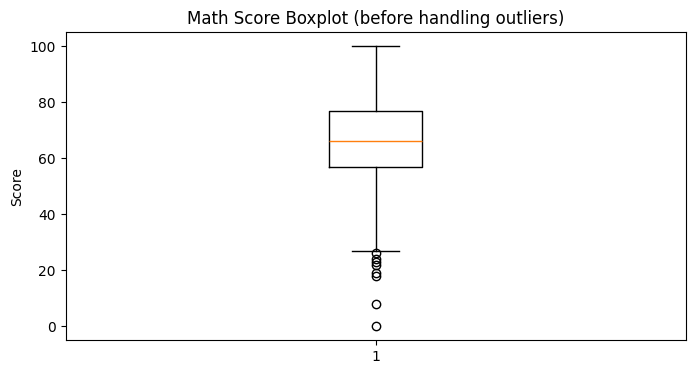

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.boxplot(data['math_score'])
plt.title('Math Score Boxplot (before handling outliers)')
plt.ylabel('Score')
plt.show()

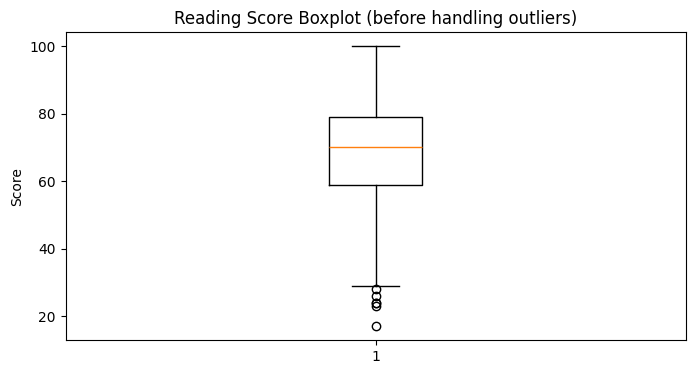

In [8]:
plt.figure(figsize=(8,4))
plt.boxplot(data['reading_score'])
plt.title('Reading Score Boxplot (before handling outliers)')
plt.ylabel('Score')
plt.show()

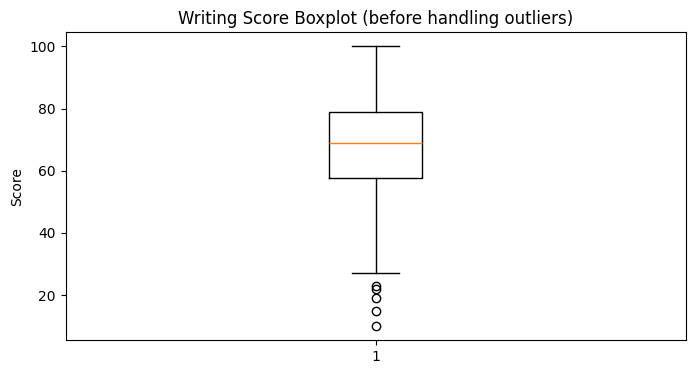

In [9]:
plt.figure(figsize=(8,4))
plt.boxplot(data['writing_score'])
plt.title('Writing Score Boxplot (before handling outliers)')
plt.ylabel('Score')
plt.show()

In [10]:
import numpy as np
numerical_columns = data.select_dtypes(include=np.number).columns
data[numerical_columns] = data[numerical_columns].astype(np.float64)
for col in numerical_columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  median = data[col].median()
  data[col] = np.where((data[col]<lower) | (data[col]>upper), median, data[col])

In [11]:
data.isna().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [12]:
data.dtypes

,0
gender,object
race/ethnicity,object
parental_level_of_education,object
lunch,object
test_preparation_course,object
math_score,float64
reading_score,float64
writing_score,float64


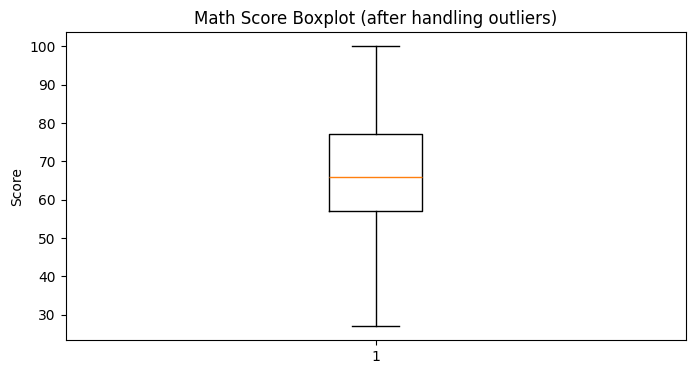

In [13]:
plt.figure(figsize=(8,4))
plt.boxplot(data['math_score'])
plt.title('Math Score Boxplot (after handling outliers)')
plt.ylabel('Score')
plt.show()

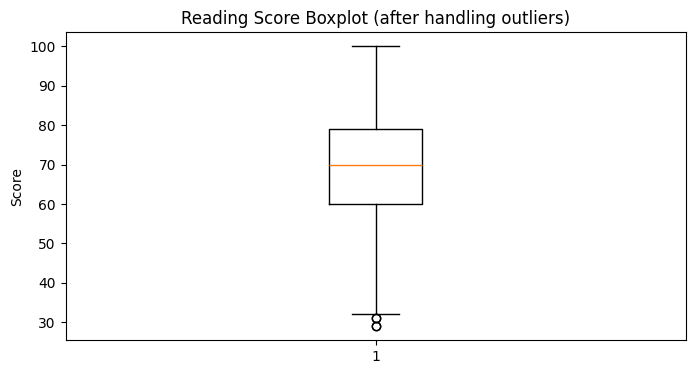

In [14]:
plt.figure(figsize=(8,4))
plt.boxplot(data['reading_score'])
plt.title('Reading Score Boxplot (after handling outliers)')
plt.ylabel('Score')
plt.show()

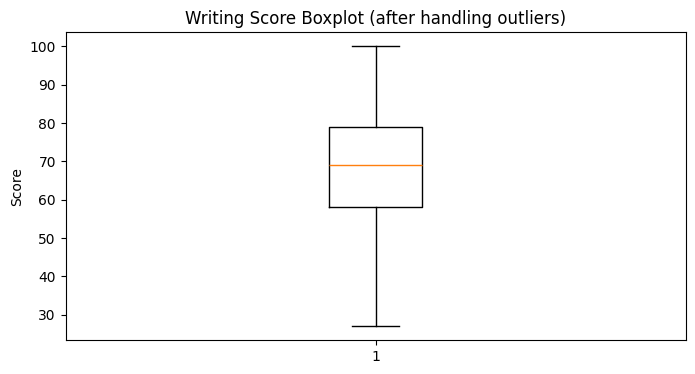

In [15]:
plt.figure(figsize=(8,4))
plt.boxplot(data['writing_score'])
plt.title('Writing Score Boxplot (after handling outliers)')
plt.ylabel('Score')
plt.show()

In [16]:
data['parental_level_of_education'].value_counts()

,count
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [17]:
data['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [18]:
data['test_preparation_course'].value_counts()

,count
test_preparation_course,
none,642
completed,358


In [19]:
x = data[['gender', 'lunch', 'parental_level_of_education', 'test_preparation_course']]
y_math = data['math_score']
y_reading = data['reading_score']
y_writing = data['writing_score']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['test_preparation_course'] = le.fit_transform(x['test_preparation_course'])

In [21]:
from sklearn.preprocessing import OneHotEncoder
x = pd.get_dummies(x, columns=['gender','lunch','parental_level_of_education'], drop_first=True)
x.head()

,test_preparation_course,gender_male,lunch_standard,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school
0,1,False,True,True,False,False,False,False
1,0,False,True,False,False,False,True,False
2,1,False,True,False,False,True,False,False
3,1,True,False,False,False,False,False,False
4,1,True,True,False,False,False,True,False


In [22]:
from sklearn.model_selection import train_test_split
x_train_math,x_test_math,y_train_math,y_test_math = train_test_split(x, y_math, test_size=0.2, random_state=42)
x_train_reading,x_test_reading,y_train_reading,y_test_reading = train_test_split(x, y_reading, test_size=0.2, random_state=42)
x_train_writing,x_test_writing,y_train_writing,y_test_writing = train_test_split(x, y_writing , test_size=0.2, random_state=42)

In [23]:
from sklearn import linear_model
model_math = linear_model.LinearRegression()
model_math.fit(x_train_math, y_train_math)

LinearRegression()

In [24]:
model_reading = linear_model.LinearRegression()
model_reading.fit(x_train_reading, y_train_reading)

LinearRegression()

In [25]:
model_writing = linear_model.LinearRegression()
model_writing.fit(x_train_writing, y_train_writing)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_math = model_math.predict(x_test_math)
mae_math = mean_absolute_error(y_test_math, y_pred_math)
rmse_math = np.sqrt(mean_squared_error(y_test_math, y_pred_math))
print(f'Math Score - MAE: {mae_math:.2f}, RMSE: {rmse_math:.2f}')

Math Score - MAE: 11.06, RMSE: 13.48


In [27]:
y_pred_reading = model_reading.predict(x_test_reading)
mae_reading = mean_absolute_error(y_test_reading, y_pred_reading)
rmse_reading = np.sqrt(mean_squared_error(y_test_reading, y_pred_reading))
print(f'Reading Score - MAE: {mae_reading:.2f}, RMSE: {rmse_reading:.2f}')

Reading Score - MAE: 10.43, RMSE: 12.94


In [28]:
y_pred_writing = model_writing.predict(x_test_writing)
mae_writing = mean_absolute_error(y_test_writing, y_pred_writing)
rmse_writing = np.sqrt(mean_squared_error(y_test_writing, y_pred_writing))
print(f'Writing Score - MAE: {mae_writing:.2f}, RMSE: {rmse_writing:.2f}')

Writing Score - MAE: 9.84, RMSE: 12.54


In [29]:
coeff_math = pd.DataFrame({'Feature': x.columns, 'Coefficient': model_math.coef_})
print("Math Score Coefficients:")
print(coeff_math)

Math Score Coefficients:
                                         Feature  Coefficient
0                        test_preparation_course    -5.852340
1                                    gender_male     3.947645
2                                 lunch_standard    10.698225
3  parental_level_of_education_bachelor's degree     2.839330
4        parental_level_of_education_high school    -4.221157
5    parental_level_of_education_master's degree     0.931381
6       parental_level_of_education_some college    -0.173985
7   parental_level_of_education_some high school    -2.930432


In [30]:
coeff_reading = pd.DataFrame({'Feature': x.columns, 'Coefficient': model_reading.coef_})
print("Reading Score Coefficients:")
print(coeff_reading)

Reading Score Coefficients:
                                         Feature  Coefficient
0                        test_preparation_course    -7.415991
1                                    gender_male    -7.240643
2                                 lunch_standard     7.066367
3  parental_level_of_education_bachelor's degree     3.087989
4        parental_level_of_education_high school    -4.138917
5    parental_level_of_education_master's degree     2.215630
6       parental_level_of_education_some college    -0.971524
7   parental_level_of_education_some high school    -3.026578


In [31]:
coeff_writing = pd.DataFrame({'Feature': x.columns, 'Coefficient': model_writing.coef_})
print("Writing Score Coefficients:")
print(coeff_writing)

Writing Score Coefficients:
                                         Feature  Coefficient
0                        test_preparation_course    -9.958567
1                                    gender_male    -9.312574
2                                 lunch_standard     8.367185
3  parental_level_of_education_bachelor's degree     4.260950
4        parental_level_of_education_high school    -5.185258
5    parental_level_of_education_master's degree     3.427068
6       parental_level_of_education_some college    -1.033401
7   parental_level_of_education_some high school    -4.337960


In [32]:
import os
import joblib
os.makedirs('saved_models', exist_ok=True)
joblib.dump(model_math, 'saved_models/model_math.mpk1')
joblib.dump(model_reading, 'saved_models/model_reading.mpk1')
joblib.dump(model_writing, 'saved_models/model_writing.mpk1')

['saved_models/model_writing.mpk1']